In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 40.0MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.5MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D , MaxPooling2D , Flatten,BatchNormalization ,Dropout

In [8]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [18]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 104ms/step - loss: 1.4256 - accuracy: 0.5692 - val_loss: 0.6214 - val_accuracy: 0.6460
Epoch 2/10
625/625 [==============================] - 68s 107ms/step - loss: 0.6150 - accuracy: 0.6704 - val_loss: 0.5439 - val_accuracy: 0.7320
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5266 - accuracy: 0.7340 - val_loss: 0.6001 - val_accuracy: 0.7018
Epoch 4/10
625/625 [==============================] - 74s 118ms/step - loss: 0.4769 - accuracy: 0.7727 - val_loss: 0.4873 - val_accuracy: 0.7682
Epoch 5/10
625/625 [==============================] - 85s 135ms/step - loss: 0.4123 - accuracy: 0.8095 - val_loss: 0.4628 - val_accuracy: 0.7686
Epoch 6/10
625/625 [==============================] - 76s 121ms/step - loss: 0.3546 - accuracy: 0.8394 - val_loss: 0.4399 - val_accuracy: 0.7834
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2967 - accuracy: 0.8692 - val_loss: 0.4324 - val_ac

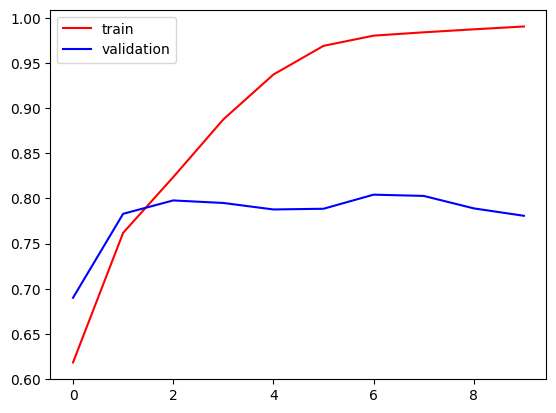

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label= 'validation')
plt.legend()
plt.show()

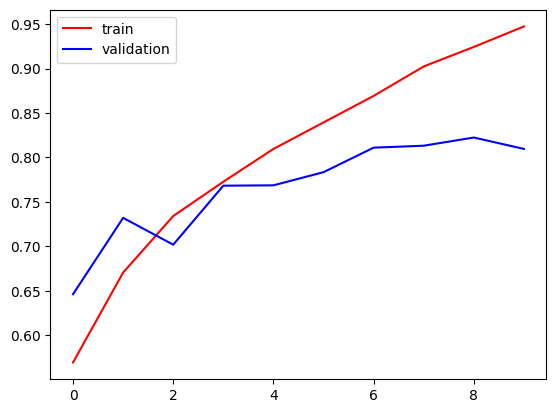

In [23]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


In [50]:
import cv2

In [51]:
test_img = cv2.imread('/content/dog.jpg')

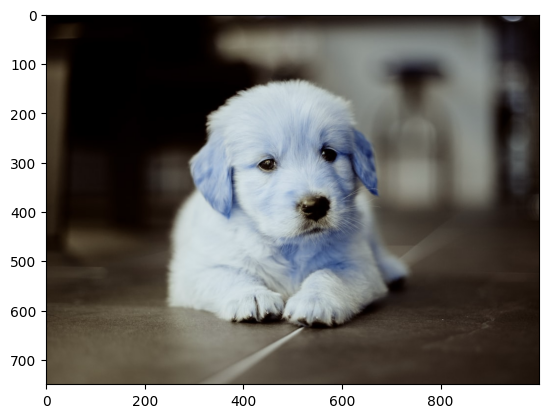

In [52]:
plt.imshow(test_img)

In [53]:
test_img.shape

(750, 1000, 3)

In [54]:
test_img = cv2.resize(test_img,(256,256))

In [55]:
test_input = test_img.reshape((1,256,256,3))

In [56]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)